In [2]:
import numpy as np

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of sigmoid function
def sigmoid_derivative(x):
    return x * (1 - x)

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize random weights and biases
        self.weights_input_hidden = np.random.rand(input_size, hidden_size)
        self.bias_hidden = np.zeros((1, hidden_size))
        self.weights_hidden_output = np.random.rand(hidden_size, output_size)
        self.bias_output = np.zeros((1, output_size))

    def forward(self, inputs):
        # Feedforward
        self.inputs = inputs
        self.hidden_layer_input = np.dot(inputs, self.weights_input_hidden) + self.bias_hidden
        self.hidden_layer_output = sigmoid(self.hidden_layer_input)
        self.output_layer_input = np.dot(self.hidden_layer_output, self.weights_hidden_output) + self.bias_output
        self.output = sigmoid(self.output_layer_input)
        return self.output

    def backward(self, target, learning_rate):
        # Backpropagation
        loss = target - self.output
        delta_output = loss * sigmoid_derivative(self.output)
        loss_hidden = delta_output.dot(self.weights_hidden_output.T)
        delta_hidden = loss_hidden * sigmoid_derivative(self.hidden_layer_output)

        # Update weights and biases
        self.weights_hidden_output += np.dot(self.hidden_layer_output.T, delta_output) * learning_rate
        self.bias_output += np.sum(delta_output, axis=0, keepdims=True) * learning_rate
        self.weights_input_hidden += np.dot(self.inputs.T, delta_hidden) * learning_rate
        self.bias_hidden += np.sum(delta_hidden, axis=0, keepdims=True) * learning_rate

if __name__ == "__main__":
    # Define neural network parameters
    input_size = 4
    hidden_size = 8
    output_size = 1

    # Create neural network
    nn = NeuralNetwork(input_size, hidden_size, output_size)

    # Training data and target data
    training_data = np.array([[0, 0, 1, 1], [0, 1, 1, 1], [1, 0, 1, 0], [1, 1, 1, 0]])
    target_data = np.array([[0], [1], [1], [0]])

    # Training loop
    for _ in range(20000):
        nn.forward(training_data)
        nn.backward(target_data, learning_rate=0.001)

    # Test with new data
    new_data = np.array([0, 1, 0, 0])
    predicted_output = nn.forward(new_data)

    # Print predicted output
    print(f"Predicted output: {predicted_output[0]}")


Predicted output: [0.4791302]


In [3]:
# using iris data set
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import sklearn
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical

In [4]:
# load iris data and preprocessing
iris = load_iris()
X = iris.data
y = iris.target
x_train, x_test, y_train, y_test = train_test_split(X,y,
random_state=42,
test_size=0.25,
shuffle=True)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
# One-hot encode the target variable
y_train_encoded = to_categorical(y_train)

In [5]:
y_train_encoded[:2]

array([[1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
# Create a sequential model
model = Sequential()
# Add layers to the model
model.add(Dense(64, activation='relu', input_shape=(4,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))
# Compile the model
model.compile(optimizer='adam',
loss='categorical_crossentropy',
metrics=['accuracy'])
history = model.fit(x_train, y_train_encoded, epochs=50, validation_split=0.2)

Epoch 1/50
3/3 [==============================] - 1s 128ms/step - loss: 1.0523 - accuracy: 0.5281 - val_loss: 0.9910 - val_accuracy: 0.6087
Epoch 2/50
3/3 [==============================] - 0s 18ms/step - loss: 0.9788 - accuracy: 0.5843 - val_loss: 0.9292 - val_accuracy: 0.7391
Epoch 3/50
3/3 [==============================] - 0s 17ms/step - loss: 0.9150 - accuracy: 0.6742 - val_loss: 0.8727 - val_accuracy: 0.8261
Epoch 4/50
3/3 [==============================] - 0s 17ms/step - loss: 0.8558 - accuracy: 0.7416 - val_loss: 0.8203 - val_accuracy: 0.8261
Epoch 5/50
3/3 [==============================] - 0s 17ms/step - loss: 0.7993 - accuracy: 0.7528 - val_loss: 0.7719 - val_accuracy: 0.8261
Epoch 6/50
3/3 [==============================] - 0s 18ms/step - loss: 0.7466 - accuracy: 0.7753 - val_loss: 0.7271 - val_accuracy: 0.8261
Epoch 7/50
3/3 [==============================] - 0s 17ms/step - loss: 0.7009 - accuracy: 0.7753 - val_loss: 0.6856 - val_accuracy: 0.8261
Epoch 8/50
3/3 [==========

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                320       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 3)                 195       
                                                                 
Total params: 4675 (18.26 KB)
Trainable params: 4675 (18.26 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
# testing
from sklearn.metrics import accuracy_score
y_pred = model.predict(x_test)
y_pred = y_pred.argmax(axis=1)
test_accuracy = accuracy_score(y_test, y_pred)
print('Test Accuracy (using scikit-learn):', test_accuracy)

2/2 [==============================] - 0s 15ms/step
Test Accuracy (using scikit-learn): 1.0


<Axes: >

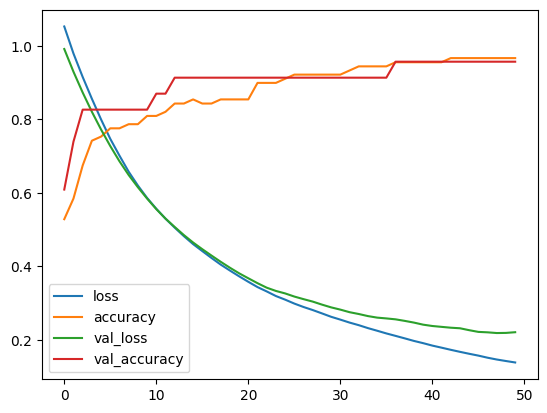

In [9]:
pd.DataFrame(history.history).plot()